In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("C:/Users/ashfa/Desktop/rice final/rice new one.xlsx")
df.head()

,Year_New,Season,Sown (*000 Acres),Harvested (*000 Acres),GDP B$,Inflation(%),Rainfall(mm),Temperature(°C),Production (*000 Mt.)
0,1950,Yala,389.0,362.0,0.869,6.95,768,29.32,167
1,1950,Maha,710.0,678.0,0.857,2.27,1540,26.17,359
2,1951,Yala,402.0,386.0,0.692,3.85,749,28.43,176
3,1951,Maha,738.0,700.0,0.820,2.92,1347,27.49,385
4,1952,Yala,424.0,402.0,1.176,8.39,533,29.38,219


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year_New                 149 non-null    int64  
 1   Season                   149 non-null    object 
 2   Sown (*000  Acres)       149 non-null    float64
 3   Harvested (*000  Acres)  149 non-null    float64
 4   GDP B$                   149 non-null    float64
 5   Inflation(%)             149 non-null    float64
 6   Rainfall(mm)             149 non-null    int64  
 7   Temperature(°C)          149 non-null    float64
 8   Production (*000  Mt.)   149 non-null    int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 10.6+ KB


In [3]:
df.isnull().sum()

Year_New                   0
Season                     0
Sown (*000  Acres)         0
Harvested (*000  Acres)    0
GDP B$                     0
Inflation(%)               0
Rainfall(mm)               0
Temperature(°C)            0
Production (*000  Mt.)     0
dtype: int64

In [4]:
df.describe()

,Year_New,Sown (*000 Acres),Harvested (*000 Acres),GDP B$,Inflation(%),Rainfall(mm),Temperature(°C),Production (*000 Mt.)
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,1986.751678,1025.882329,971.636940,32.397356,8.325168,1093.530201,27.061342,1171.167785
std,21.579804,404.363853,392.128673,119.727984,6.711841,633.111755,1.286175,732.832651
min,1950.000000,354.000000,328.000000,0.489000,-1.540000,385.000000,24.480000,167.000000
25%,1968.000000,684.000000,661.000000,1.970000,3.870000,477.000000,26.320000,534.000000
50%,1987.000000,948.000000,888.000000,6.830000,7.010000,894.000000,26.760000,1049.000000
75%,2005.000000,1329.000000,1250.000000,28.280000,11.380000,1730.000000,27.350000,1671.000000
max,2024.000000,2007.977000,1996.280000,1435.000000,49.720000,2470.000000,31.080000,3197.000000


### Exploratory Data Analysis (EDA)

In [5]:
def detect_outliers_iqr(data):
    outlier_indices = {}
    numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
    
    for col in numeric_cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        if not outliers.empty:
            outlier_indices[col] = outliers.index.tolist()
    
    return outlier_indices

outliers_dict = detect_outliers_iqr(df)
print("Outliers by column:")
for col, indices in outliers_dict.items():
    print(f"{col}: {len(indices)} outliers")

Outliers by column:
GDP B$: 28 outliers
Inflation(%): 4 outliers
Temperature(°C): 23 outliers


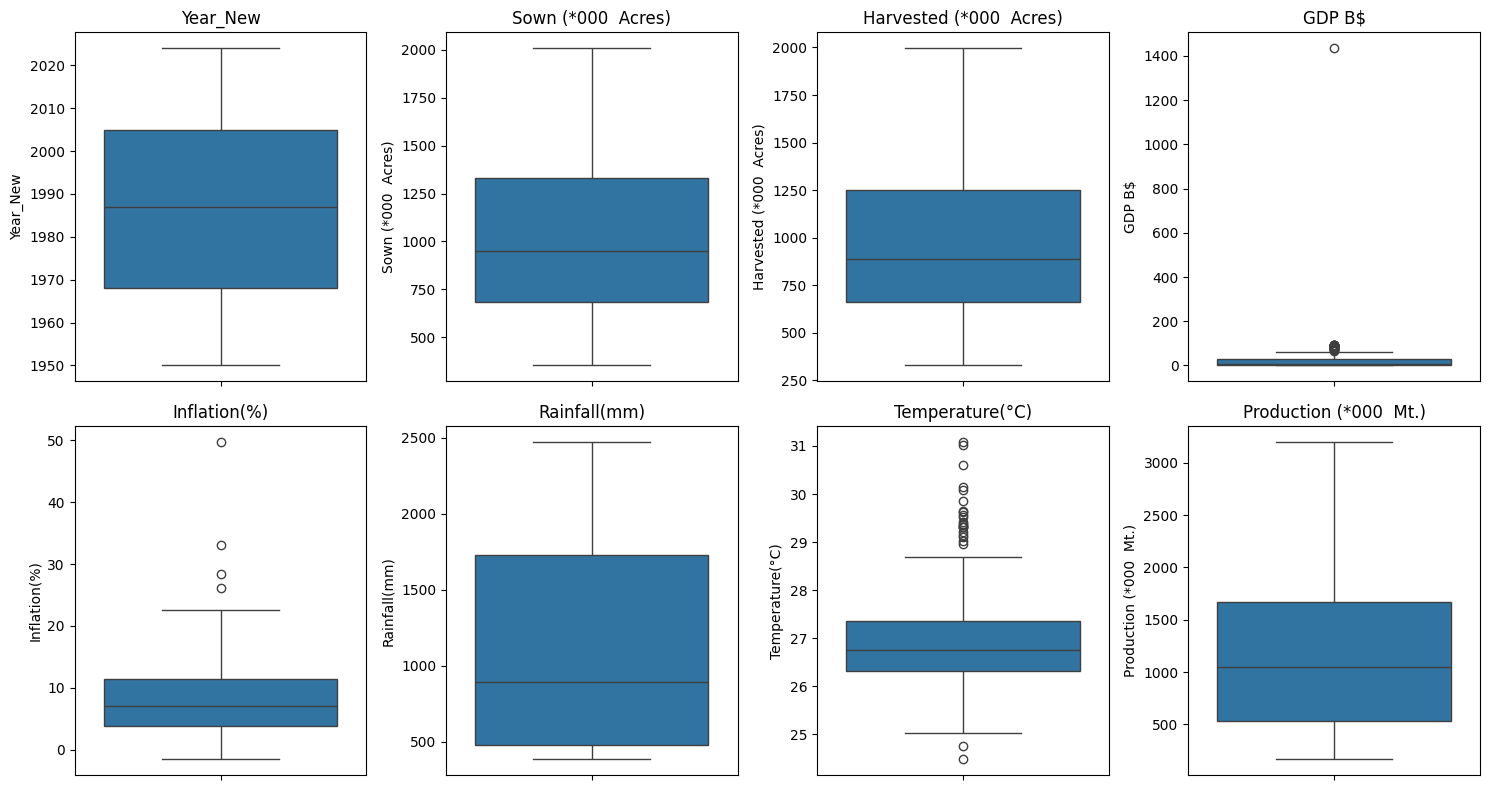

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, int((len(numeric_cols)+1)/2), i)
    sns.boxplot(data=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [7]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Columns with outliers to remove
columns_with_outliers = ['GDP B$', 'Inflation(%)', 'Temperature(°C)']

# Remove outliers
df_cleaned = remove_outliers_iqr(df, columns_with_outliers)

# Check the shape after removing outliers
print("Original shape:", df.shape)
print("Cleaned shape:", df_cleaned.shape)

Original shape: (149, 9)
Cleaned shape: (103, 9)


In [8]:
# Encode Season (Yala = 0, Maha = 1)
df['Season'] = df['Season'].map({'Yala': 0, 'Maha': 1})

### Line plot of production that changes over time

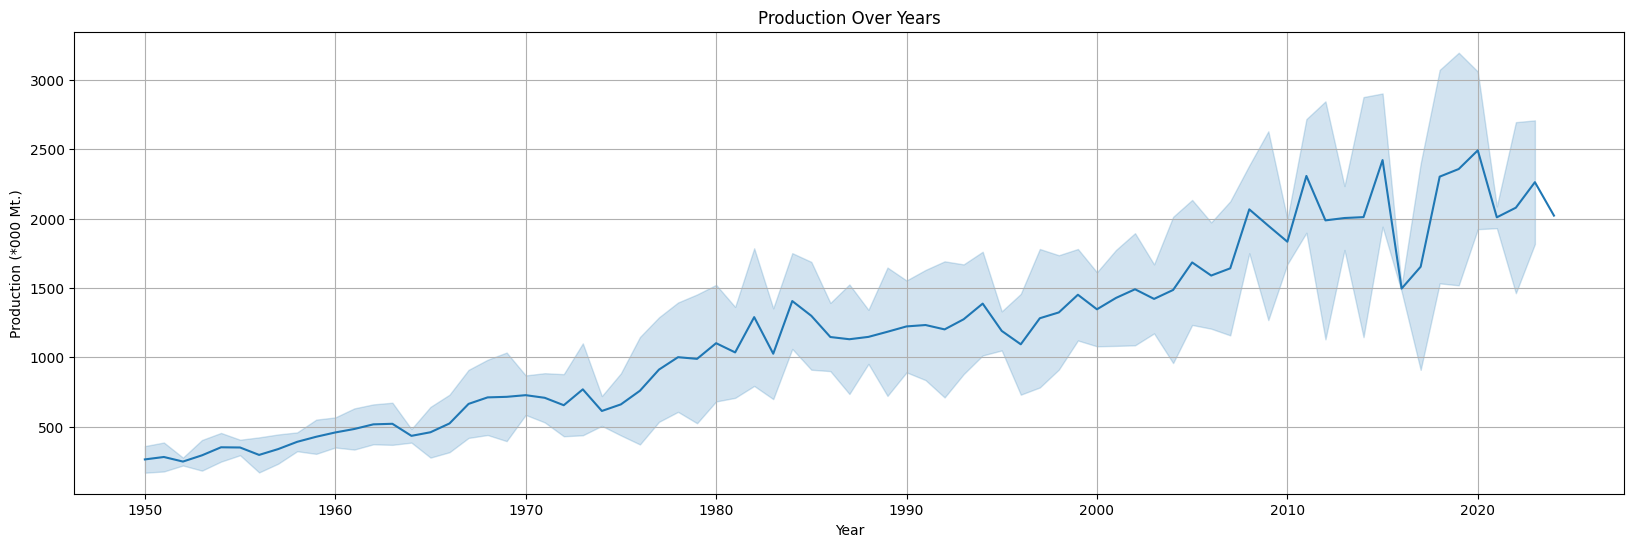

In [9]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=df, x='Year_New', y='Production (*000  Mt.)')
plt.title('Production Over Years')
plt.xlabel('Year')
plt.grid(True)
plt.ylabel('Production (*000 Mt.)')
plt.show()

### Making correlations with the variables 

In [10]:
from scipy.stats import shapiro

#Normality test for numerical columns
normality_p_values={}
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    stat, p_value=shapiro(df[col])
    normality_p_values[col]=p_value
    print(f'{col}: p-value={p_value:.4f}')

Year_New: p-value=0.0001
Season: p-value=0.0000
Sown (*000  Acres): p-value=0.0001
Harvested (*000  Acres): p-value=0.0001
GDP B$: p-value=0.0000
Inflation(%): p-value=0.0000
Rainfall(mm): p-value=0.0000
Temperature(°C): p-value=0.0000
Production (*000  Mt.): p-value=0.0000


In [11]:
#Choosing the best correlation method
correlation_method= 'Spearman' if any(p < 0.05 for p in normality_p_values.values()) else 'Pearson'
print(f'\nUsing {correlation_method} correlation based on normality test.')


Using Spearman correlation based on normality test.


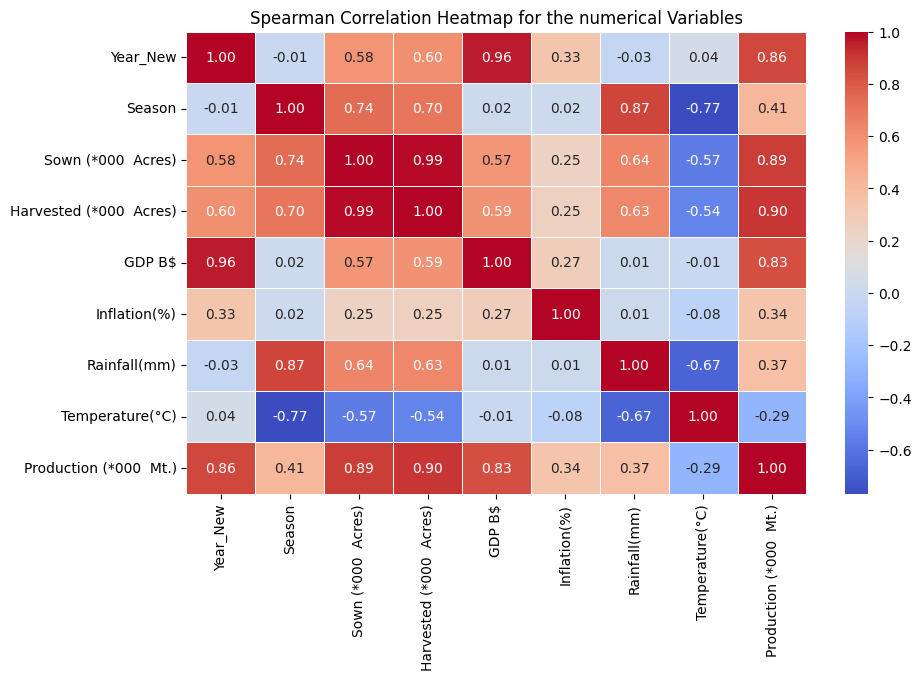

In [12]:
#Compute correlation matrix
df=df.select_dtypes(include=['number'])

correlation_matrix=df.corr(method=correlation_method.lower())

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title(f'{correlation_method} Correlation Heatmap for the numerical Variables')
plt.show()

### Define Features (X) and Target (y)

In [24]:
# Assuming the X and Y variables as follows,
features = ['Rainfall(mm)', 'Harvested (*000  Acres)', 'Sown (*000  Acres)']
target = 'Production (*000  Mt.)'

###  Split and Train Separate Models

In [25]:
X = df[features]
y = df[target]

###  Split into Training and Test Sets

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Random Forest Model

In [27]:
from sklearn.ensemble import RandomForestRegressor

model1 = RandomForestRegressor(random_state=42)
model1.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [28]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

y_pred_r = model1.predict(X_test)

# Evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred_r))
mae = mean_absolute_error(y_test, y_pred_r)
mape = mean_absolute_percentage_error(y_test, y_pred_r) * 100 

print("R² Score:", r2_score(y_test, y_pred_r))
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")

R² Score: 0.9134285005053667
RMSE: 210.33
MAE: 160.85
MAPE: 19.25%


### XGBoost Model

In [18]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np
from sklearn.model_selection import train_test_split

In [19]:
# Initialize and train XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb) * 100  # in percentage

# Print results
print("R² Score:", r2_score(y_test, y_pred_xgb))
print(f"XGBoost RMSE: {rmse_xgb:.2f}")
print(f"XGBoost MAE: {mae_xgb:.2f}")
print(f"XGBoost MAPE: {mape_xgb:.2f}%")

R² Score: 0.8788517713546753
XGBoost RMSE: 248.81
XGBoost MAE: 181.93
XGBoost MAPE: 21.96%


### Random Forest: Actual vs Predicted plot

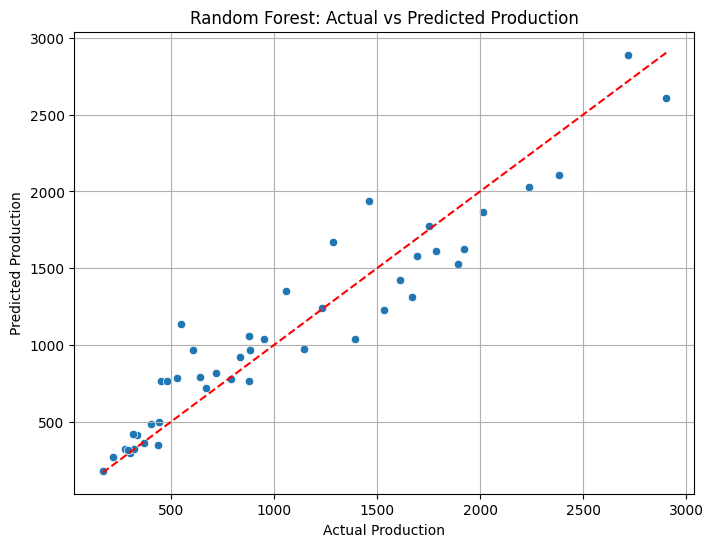

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_r)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Production')
plt.ylabel('Predicted Production')
plt.title('Random Forest: Actual vs Predicted Production')
plt.grid(True)
plt.show()


### XGBoost: Actual vs Predicted plot

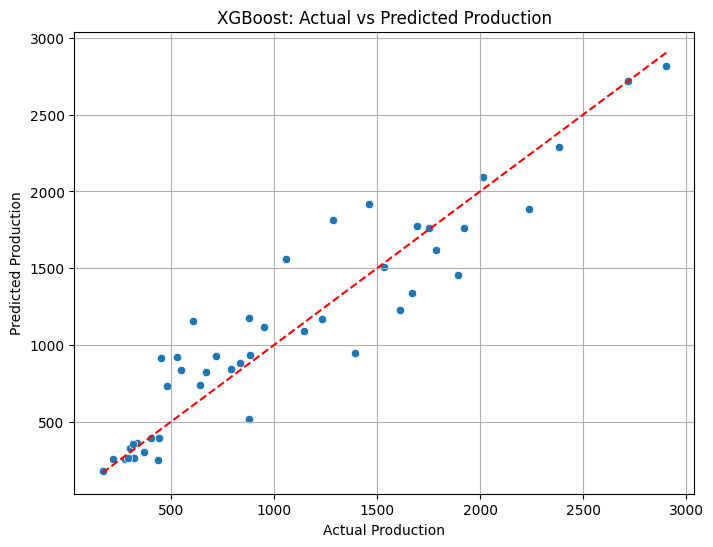

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_xgb)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Production')
plt.ylabel('Predicted Production')
plt.title('XGBoost: Actual vs Predicted Production')
plt.grid(True)
plt.show()

### Random Forest

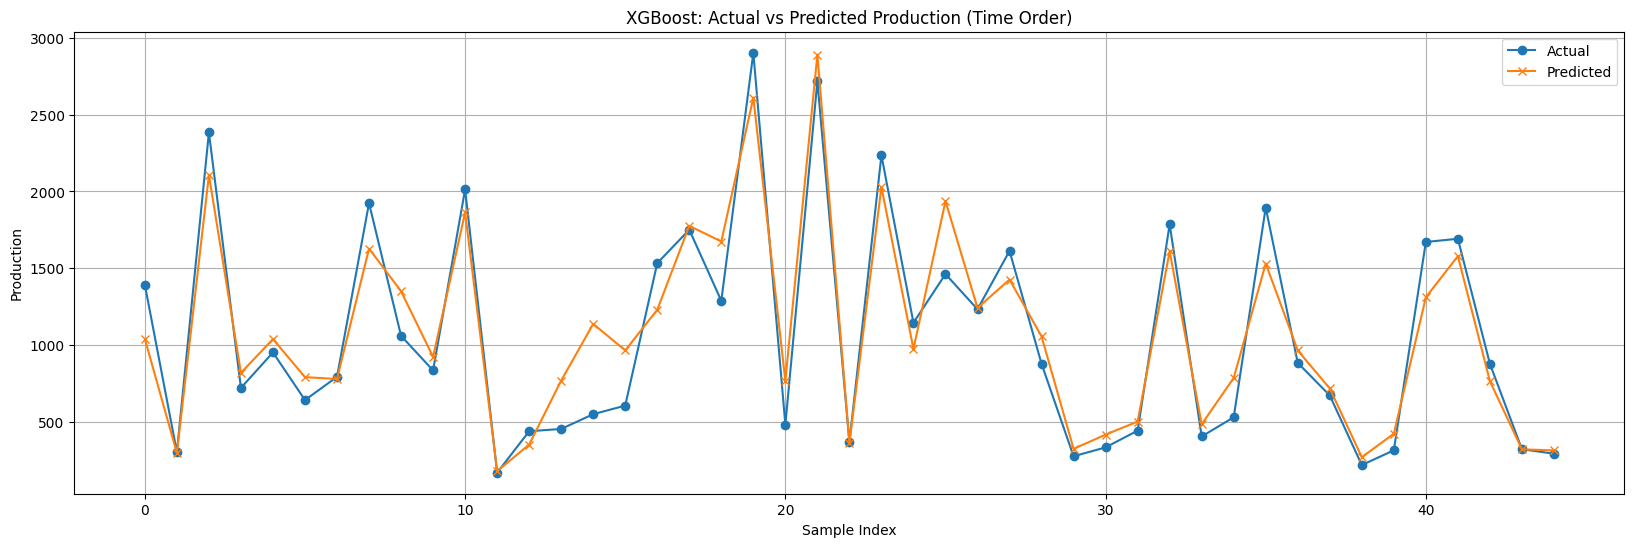

In [22]:
plt.figure(figsize=(20, 6))
plt.plot(range(len(y_test)), y_test.values, label='Actual', marker='o')
plt.plot(range(len(y_pred_r)), y_pred_r, label='Predicted', marker='x')
plt.title('XGBoost: Actual vs Predicted Production (Time Order)')
plt.xlabel('Sample Index')
plt.ylabel('Production')
plt.legend()
plt.grid(True)
plt.show()

### XGBoost

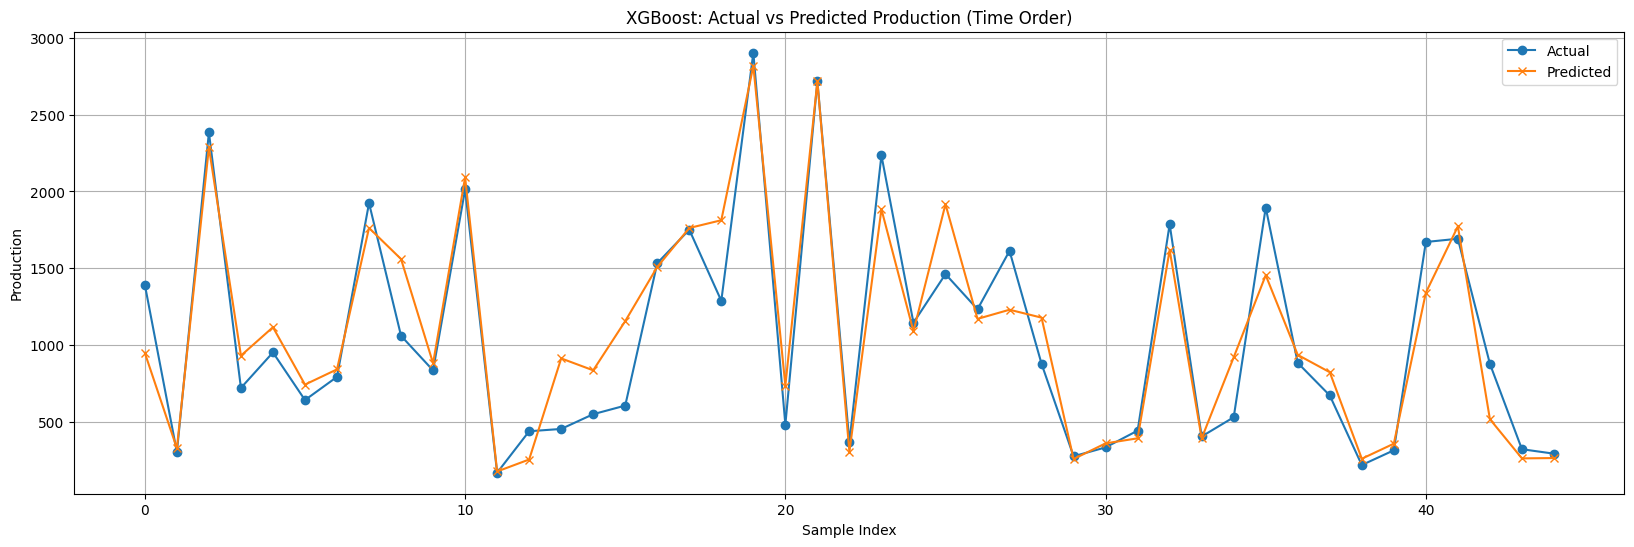

In [23]:
plt.figure(figsize=(20, 6))
plt.plot(range(len(y_test)), y_test.values, label='Actual', marker='o')
plt.plot(range(len(y_pred_xgb)), y_pred_xgb, label='Predicted', marker='x')
plt.title('XGBoost: Actual vs Predicted Production (Time Order)')
plt.xlabel('Sample Index')
plt.ylabel('Production')
plt.legend()
plt.grid(True)
plt.show()